# ADEase Time Series

## Problem Statement

Ad Ease is an ads and marketing based company helping businesses elicit maximum clicks @ minimum cost. AdEase is an ad infrastructure to help businesses promote themselves easily, effectively, and economically. The interplay of 3 AI modules - Design, Dispense, and Decipher, come together to make it this an end-to-end 3 step process digital advertising solution for all.

You are working in the Data Science team of Ad ease trying to understand the per page view report for different wikipedia pages for 550 days, and forecasting the number of views so that you can predict and optimize the ad placement for your clients. You are provided with the data of 145k wikipedia pages and daily view count for each of them. Your clients belong to different regions and need data on how their ads will perform on pages in different languages.

Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime

In [2]:
!gdown 1fYtXekn2KAtjPyhSatxLS83e6P_tkj0E

Downloading...
From: https://drive.google.com/uc?id=1fYtXekn2KAtjPyhSatxLS83e6P_tkj0E
To: /content/Exog_Campaign_eng.csv
100% 1.10k/1.10k [00:00<00:00, 3.13MB/s]


In [3]:
!gdown 163R-3Z4xSvsmhFN-hoU6xqffu0SFOUoM

Downloading...
From (original): https://drive.google.com/uc?id=163R-3Z4xSvsmhFN-hoU6xqffu0SFOUoM
From (redirected): https://drive.google.com/uc?id=163R-3Z4xSvsmhFN-hoU6xqffu0SFOUoM&confirm=t&uuid=fcc39d44-587e-4d9d-af72-2f117b3b62b0
To: /content/train_1.csv
100% 278M/278M [00:03<00:00, 90.7MB/s]


In [4]:
data  = pd.read_csv('train_1.csv')


In [5]:
exogenous_data = pd.read_csv('Exog_Campaign_eng.csv')

Data Exploration

In [6]:
data

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145058,Underworld_(serie_de_películas)_es.wikipedia.o...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,13.0,12.0,13.0,3.0,5.0,10.0
145059,Resident_Evil:_Capítulo_Final_es.wikipedia.org...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145060,Enamorándome_de_Ramón_es.wikipedia.org_all-acc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145061,Hasta_el_último_hombre_es.wikipedia.org_all-ac...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
data.loc[12500]['Page']

'List_of_Hallmark_Channel_Original_Movies_en.wikipedia.org_desktop_all-agents'

In [8]:
data.shape

(145063, 551)

* We have 145063 different wikipedia pages and visits for 550 days

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145063 entries, 0 to 145062
Columns: 551 entries, Page to 2016-12-31
dtypes: float64(550), object(1)
memory usage: 609.8+ MB


In [10]:
#Checking the count of nulls in each column.
data.isnull().sum()

,0
Page,0
2015-07-01,20740
2015-07-02,20816
2015-07-03,20544
2015-07-04,20654
...,...
2016-12-27,3701
2016-12-28,3822
2016-12-29,3826
2016-12-30,3635


* We can see the presence of many nulls in each column

In [11]:
data.loc[data['Page']=='52_Hz_I_Love_You_zh.wikipedia.org_all-access_spider']

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [12]:
d1 = datetime.strptime('2015-07-01', "%Y-%m-%d")
print('Start date:', d1)

d2 = datetime.strptime('2016-12-31', "%Y-%m-%d")
print('End time:',d2)

# get difference
delta = d2 - d1

# time difference in seconds
print(f"Days difference is {delta} seconds")

Start date: 2015-07-01 00:00:00
End time: 2016-12-31 00:00:00
Days difference is 549 days, 0:00:00 seconds


* We can observe some pages where the usage data is available after certain period so we have to remove such records  

#### Trend of nulls/nans in the dataset

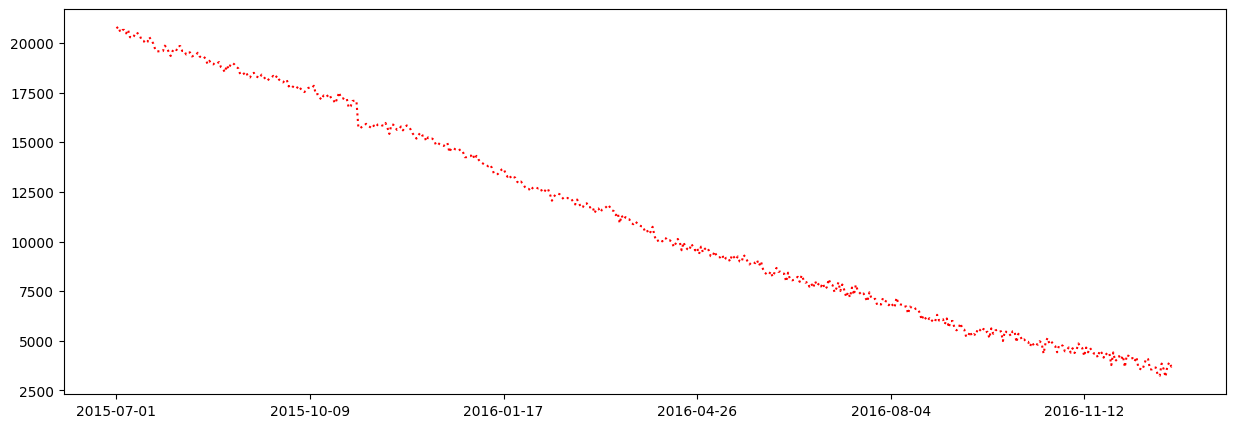

In [13]:
plt.figure(figsize=(15,5))
data.iloc[:, 1:-3 ].isnull().sum().plot(color='red', linestyle='dotted')
plt.show()

* From the above chart we can say that the no.of nans in the recent dates is less
* To address this we are dropping the rows with more than 300 null values and substituting the rest with 0  

In [14]:
data.dropna(thresh = 300, inplace = True)
data.fillna(0, inplace = True)

### Feature Extraction

In [15]:
import re

In [16]:
#Function to Extract Language from Page using Regex
def get_language(name):
    if len(re.findall(r'_(.{2}).wikipedia.org_', name)) == 1 :
        return re.findall(r'_(.{2}).wikipedia.org_', name)[0]
    else: return 'Unknown_language'

data['language'] = data['Page'].apply(get_language)


language_dict ={'de':'German',
                'en':'English',
                'es': 'Spanish',
                'fr': 'French',
                'ja': 'Japenese' ,
                'ru': 'Russian',
                'zh': 'Chinese',
                'Unknown_language': 'Unknown_language'}

data['language'] = data['language'].map(language_dict)

# Function to extract access type
def get_access_type(name):
    if len(re.findall(r'all-access|mobile-web|desktop', name)) == 1 :
        return re.findall(r'all-access|mobile-web|desktop', name)[0]
    else:
      return 'No Access_type'

data['access_type'] = data['Page'].apply(get_access_type)

#Function to extract access origin
def get_access_origin(name):
    if len(re.findall(r'[ai].org_(.*)_(.*)$', name)) == 1 :
        return re.findall(r'[ai].org_(.*)_(.*)$', name)[0][1]
    else:
      return 'No Access_origin'

data['access_origin'] = data['Page'].apply(get_access_origin)

In [17]:
#Function to extract Title
def get_title(name):
    match = re.findall(r'^(.*?)_[a-z]{2}\.wikipedia\.org_', name)
    if len(match) == 1:
        return match[0]
    else:
        return 'None'


data['title'] = data['Page'].apply(get_title)

In [18]:
data.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31,language,access_type,access_origin,title
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,14.0,20.0,22.0,19.0,18.0,20.0,Chinese,all-access,spider,2NE1
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,9.0,30.0,52.0,45.0,26.0,20.0,Chinese,all-access,spider,2PM
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,4.0,4.0,6.0,3.0,4.0,17.0,Chinese,all-access,spider,3C
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,16.0,11.0,17.0,19.0,10.0,11.0,Chinese,all-access,spider,4minute
5,5566_zh.wikipedia.org_all-access_spider,12.0,7.0,4.0,5.0,20.0,8.0,5.0,17.0,24.0,...,32.0,19.0,23.0,17.0,17.0,50.0,Chinese,all-access,spider,5566


### Data Visualization

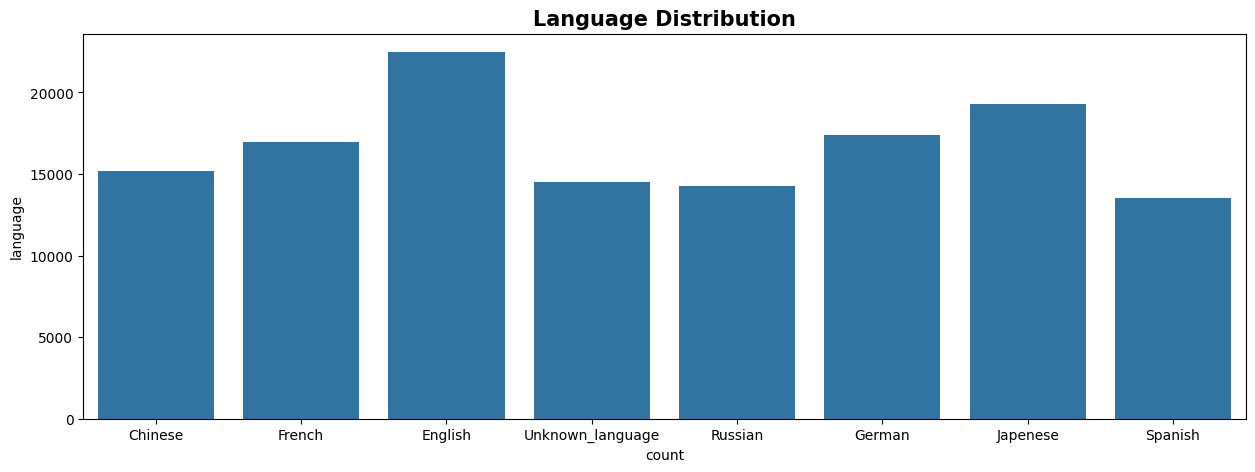

In [19]:
plt.figure(figsize=(15,5))
sns.countplot(x='language' , data=data)
plt.xlabel('count')
plt.ylabel('language')
plt.title('Language Distribution', fontsize = 15, fontweight = 'bold')
plt.show()

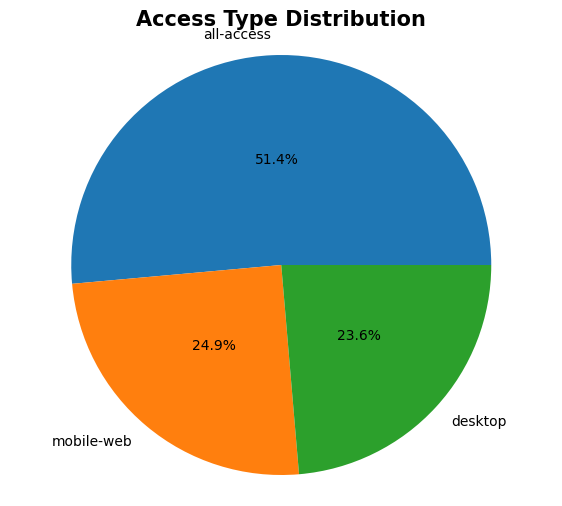

In [20]:
plt.figure(figsize=(7, 6))
plt.pie(data['access_type'].value_counts().values, labels = data['access_type'].value_counts().index,  radius=1.5,  autopct='%1.1f%%', pctdistance=0.5)
plt.title('Access Type Distribution', fontsize = 15, fontweight = 'bold')
plt.axis('equal')
plt.show()

Text(0, 0.5, 'access_origin')

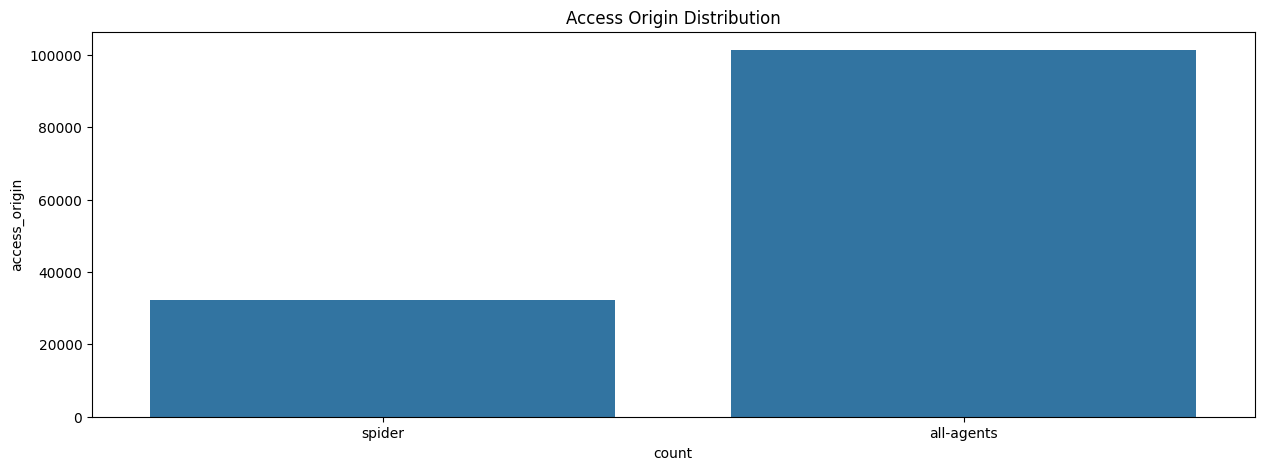

In [21]:
plt.figure(figsize=(15,5))
sns.countplot(x='access_origin' , data=data)
plt.title('Access Origin Distribution')
plt.xlabel('count')
plt.ylabel('access_origin')

In [22]:
df = data.melt(id_vars = ['Page','language','access_type','access_origin','title'])

In [23]:
df.head()

,Page,language,access_type,access_origin,title,variable,value
0,2NE1_zh.wikipedia.org_all-access_spider,Chinese,all-access,spider,2NE1,2015-07-01,18.0
1,2PM_zh.wikipedia.org_all-access_spider,Chinese,all-access,spider,2PM,2015-07-01,11.0
2,3C_zh.wikipedia.org_all-access_spider,Chinese,all-access,spider,3C,2015-07-01,1.0
3,4minute_zh.wikipedia.org_all-access_spider,Chinese,all-access,spider,4minute,2015-07-01,35.0
4,5566_zh.wikipedia.org_all-access_spider,Chinese,all-access,spider,5566,2015-07-01,12.0


In [24]:
df.rename(columns = {'variable':'Date','value':'Visits'}, inplace = True)

In [25]:
df.Date = pd.to_datetime(df.Date, format ='%Y-%m-%d')

In [26]:
df.describe()

,Date,Visits
count,73489350,7.348935e+07
mean,2016-03-31 12:00:00.000005632,1.402447e+03
min,2015-07-01 00:00:00,0.000000e+00
25%,2015-11-15 00:00:00,1.700000e+01
50%,2016-03-31 12:00:00,1.400000e+02
75%,2016-08-16 00:00:00,6.540000e+02
max,2016-12-31 00:00:00,6.726426e+07
std,NaN,8.674577e+04


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73489350 entries, 0 to 73489349
Data columns (total 7 columns):
 #   Column         Dtype         
---  ------         -----         
 0   Page           object        
 1   language       object        
 2   access_type    object        
 3   access_origin  object        
 4   title          object        
 5   Date           datetime64[ns]
 6   Visits         float64       
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 3.8+ GB


In [28]:
at_data = df.groupby(['access_type', 'Date'],as_index=False)['Visits'].sum()
ao_data = df.groupby(['access_origin', 'Date'],as_index=False)['Visits'].sum()

In [29]:
lang_data = df.groupby(['language', 'Date'],as_index=False)['Visits'].sum()

Text(0.5, 1.0, 'Language Wise Visits')

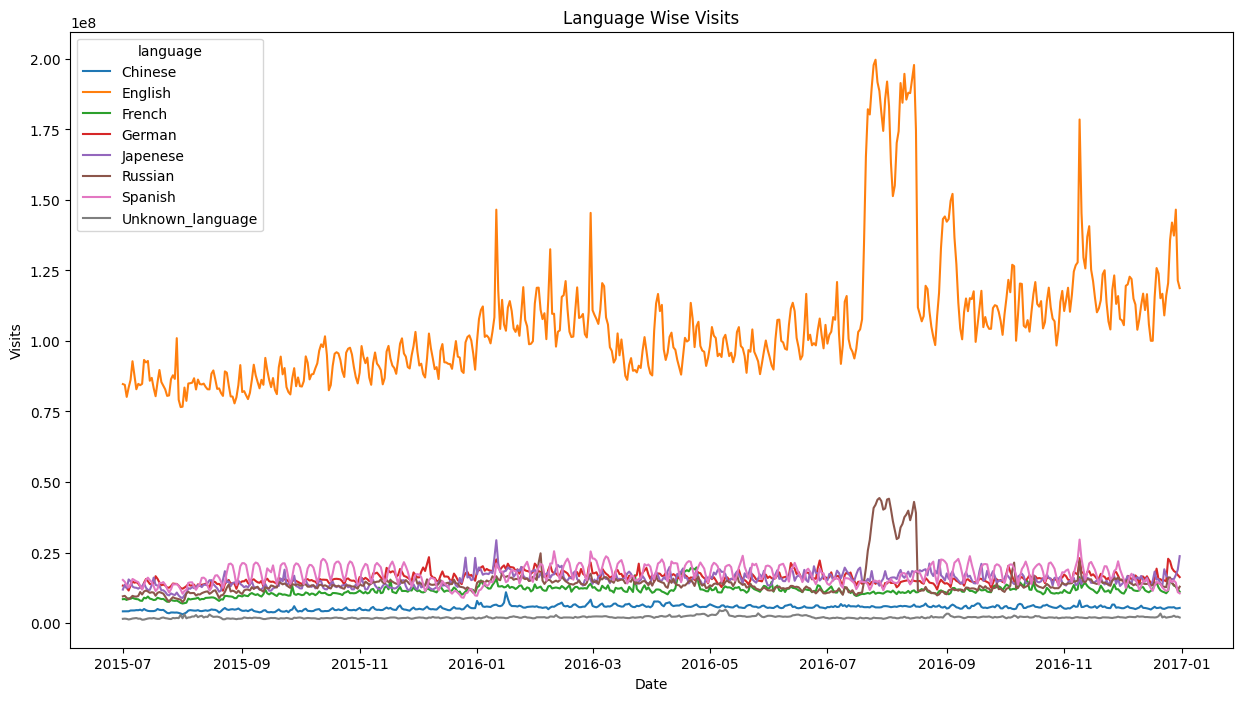

In [30]:
plt.figure(figsize=(15,8))
sns.lineplot(x='Date', y='Visits', data=lang_data ,hue='language')
plt.title('Language Wise Visits')

* From the plot we observe that English language has higher visits compared to other languages

Text(0.5, 1.0, 'Access Type Wise Visits')

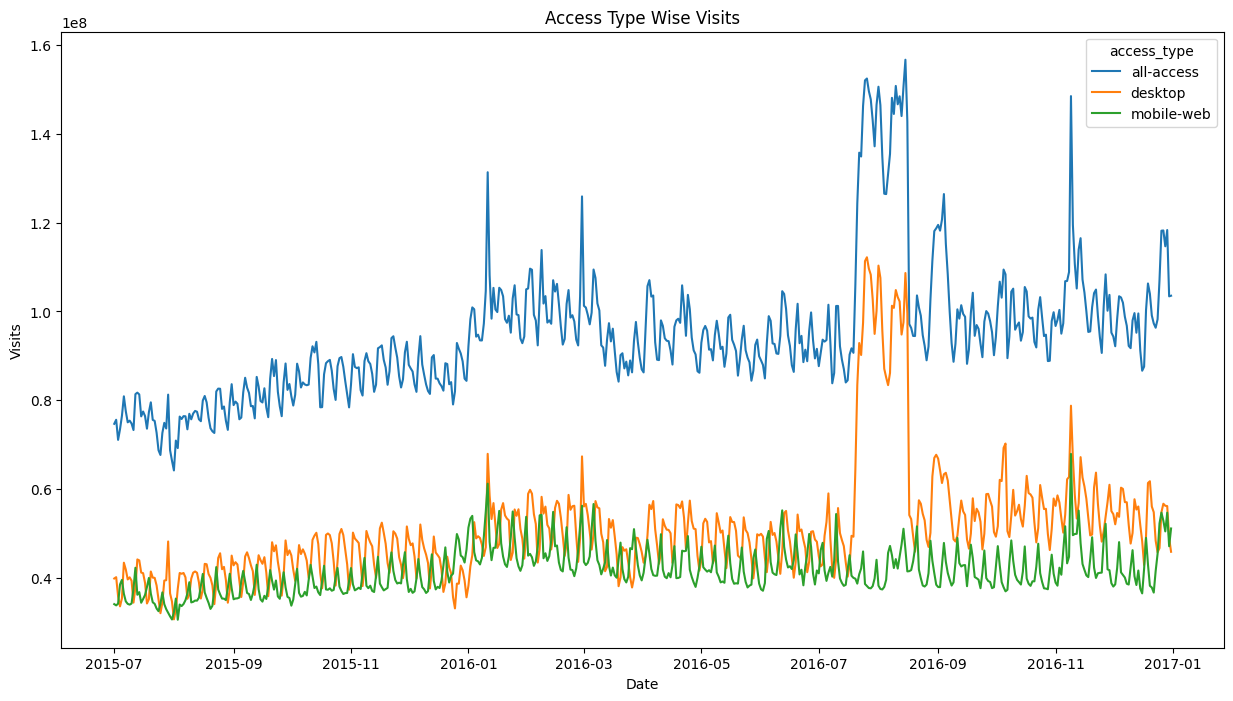

In [31]:
plt.figure(figsize=(15,8))
sns.lineplot(x='Date', y='Visits', data=at_data ,hue='access_type')
plt.title('Access Type Wise Visits')

Text(0.5, 1.0, 'Access Origin Wise Visits')

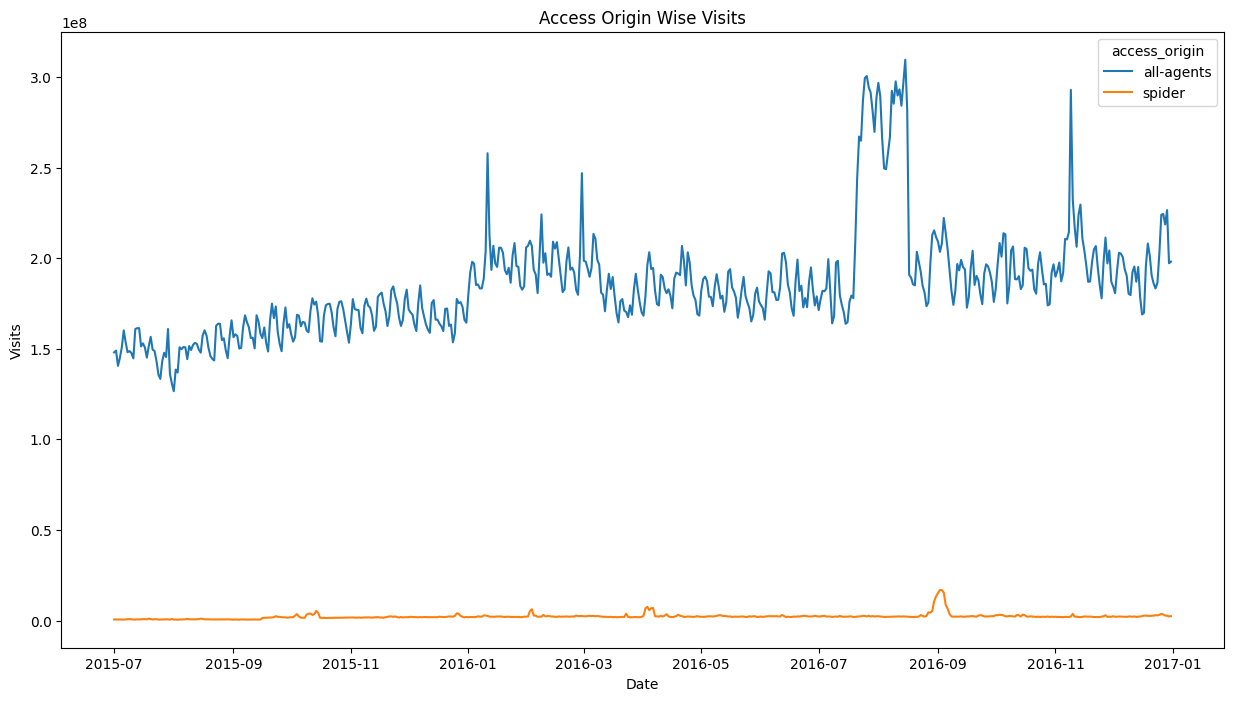

In [32]:
plt.figure(figsize=(15,8))
sns.lineplot(x='Date', y='Visits', data=ao_data ,hue='access_origin')
plt.title('Access Origin Wise Visits')

### Checking for Stationarity in data

#### Stationarity of Each Language

In [33]:
#Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller

def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    df_output = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key, value in dftest[4].items():
       df_output['Critical Value (%s)' %key] = round(value,2)
    print (df_output)

In [34]:
adf_test(lang_data[lang_data['language'] == 'English']['Visits'])

Results of Dickey-Fuller Test:
Test Statistic                  -2.373563
p-value                          0.149337
#Lags Used                      14.000000
Number of Observations Used    535.000000
Critical Value (1%)             -3.440000
Critical Value (5%)             -2.870000
Critical Value (10%)            -2.570000
dtype: float64


The test statistic > critical value / p_value > 5%. This implies that the series is not stationary.

In [35]:
adf_test(lang_data[lang_data['language'] == 'Chinese']['Visits'])

Results of Dickey-Fuller Test:
Test Statistic                  -1.921666
p-value                          0.321938
#Lags Used                      19.000000
Number of Observations Used    530.000000
Critical Value (1%)             -3.440000
Critical Value (5%)             -2.870000
Critical Value (10%)            -2.570000
dtype: float64


The test statistic > critical value / p_value > 5%. This implies that the series is not stationary.

In [36]:
adf_test(lang_data[lang_data['language'] == 'Russian']['Visits'])

Results of Dickey-Fuller Test:
Test Statistic                  -3.939402
p-value                          0.001763
#Lags Used                       3.000000
Number of Observations Used    546.000000
Critical Value (1%)             -3.440000
Critical Value (5%)             -2.870000
Critical Value (10%)            -2.570000
dtype: float64


The test statistic < critical value / p_value < 5%. This implies that the series is  stationary.

In [37]:
adf_test(lang_data[lang_data['language'] == 'German']['Visits'])

Results of Dickey-Fuller Test:
Test Statistic                  -2.405999
p-value                          0.140050
#Lags Used                      16.000000
Number of Observations Used    533.000000
Critical Value (1%)             -3.440000
Critical Value (5%)             -2.870000
Critical Value (10%)            -2.570000
dtype: float64


The test statistic > critical value / p_value > 5%. This implies that the series is not stationary.

In [38]:
adf_test(lang_data[lang_data['language'] == 'Spanish']['Visits'])

Results of Dickey-Fuller Test:
Test Statistic                  -2.928338
p-value                          0.042151
#Lags Used                      15.000000
Number of Observations Used    534.000000
Critical Value (1%)             -3.440000
Critical Value (5%)             -2.870000
Critical Value (10%)            -2.570000
dtype: float64


The test statistic < critical value / p_value < 5%. This implies that the series is stationary.

In [39]:
adf_test(lang_data[lang_data['language'] == 'French']['Visits'])

Results of Dickey-Fuller Test:
Test Statistic                  -2.920997
p-value                          0.042960
#Lags Used                      13.000000
Number of Observations Used    536.000000
Critical Value (1%)             -3.440000
Critical Value (5%)             -2.870000
Critical Value (10%)            -2.570000
dtype: float64


The test statistic < critical value / p_value < 5%. This implies that the series is stationary.

In [40]:
adf_test(lang_data[lang_data['language'] == 'Japenese']['Visits'])

Results of Dickey-Fuller Test:
Test Statistic                  -2.710066
p-value                          0.072313
#Lags Used                       8.000000
Number of Observations Used    541.000000
Critical Value (1%)             -3.440000
Critical Value (5%)             -2.870000
Critical Value (10%)            -2.570000
dtype: float64


The test statistic > critical value / p_value > 5%. This implies that the series is not stationary.

#### **Stationarity of Access -Types**

In [41]:
adf_test(at_data[at_data['access_type'] == 'all-access']['Visits'])
adf_test(at_data[at_data['access_type'] == 'mobile-web']['Visits'])
adf_test(at_data[at_data['access_type'] == 'desktop']['Visits'])

Results of Dickey-Fuller Test:
Test Statistic                  -2.582837
p-value                          0.096597
#Lags Used                      14.000000
Number of Observations Used    535.000000
Critical Value (1%)             -3.440000
Critical Value (5%)             -2.870000
Critical Value (10%)            -2.570000
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                  -2.297304
p-value                          0.172839
#Lags Used                      14.000000
Number of Observations Used    535.000000
Critical Value (1%)             -3.440000
Critical Value (5%)             -2.870000
Critical Value (10%)            -2.570000
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                  -3.124340
p-value                          0.024804
#Lags Used                      14.000000
Number of Observations Used    535.000000
Critical Value (1%)             -3.440000
Critical Value (5%)             -2.870000
Critical Value (10%)            -2.57

*  (**all-access**)The test statistic > critical value / p_value > 5%. This implies that the series is not stationary.
*  (**desktop**)The test statistic > critical value / p_value > 5%. This implies that the series is not stationary.
*  (**mobile-web**)The test statistic < critical value / p_value < 5%. This implies that the series is  stationary.

#### **Stationarity of Access - Origin types**

In [42]:
adf_test(ao_data[ao_data['access_origin'] == 'all-agents']['Visits'])
adf_test(ao_data[ao_data['access_origin'] == 'spider']['Visits'])

Results of Dickey-Fuller Test:
Test Statistic                  -2.777440
p-value                          0.061569
#Lags Used                      15.000000
Number of Observations Used    534.000000
Critical Value (1%)             -3.440000
Critical Value (5%)             -2.870000
Critical Value (10%)            -2.570000
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                  -5.226415
p-value                          0.000008
#Lags Used                       6.000000
Number of Observations Used    543.000000
Critical Value (1%)             -3.440000
Critical Value (5%)             -2.870000
Critical Value (10%)            -2.570000
dtype: float64


* (**all-agents**)The test statistic > critical value / p_value > 5%. This implies that the series is not stationary.
* (**spider**)The test statistic < critical value / p_value < 5%. This implies that the series is not stationary.

## Time Series Decomposition

Decomposition involves seperating the series to 3 components


1.   **Trend**
2.   **Seasonality**
3.   **Residuals**

2 types of decomposition can be done

1. Additive Decomposition
2. Multiplicative Decomposition



In [43]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [44]:
english_data = lang_data[lang_data['language'] == 'English']['Visits']

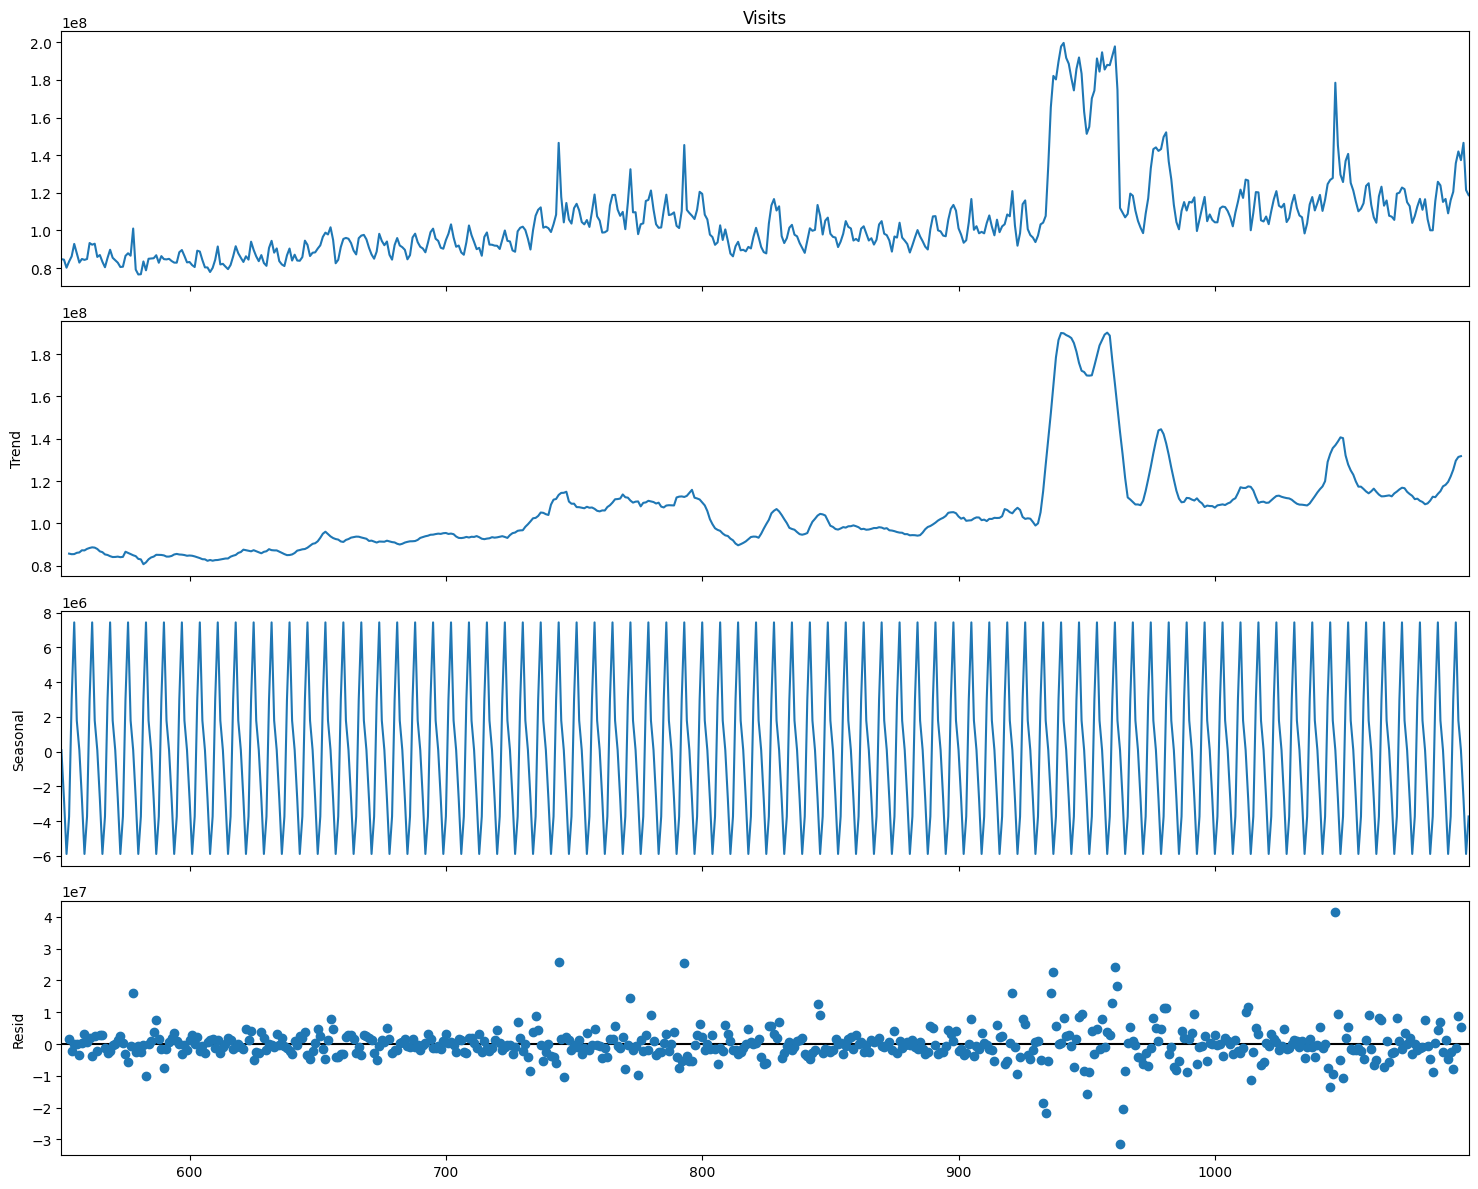

In [45]:
decomposition_e = seasonal_decompose(english_data, model='additive', period=7)

fig = decomposition_e.plot()
fig.set_size_inches((15, 12))
fig.tight_layout()
plt.show()

In [46]:
residual = pd.DataFrame(decomposition_e.resid.fillna(0).values)
adf_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                -1.152195e+01
p-value                        4.020092e-21
#Lags Used                     1.700000e+01
Number of Observations Used    5.320000e+02
Critical Value (1%)           -3.440000e+00
Critical Value (5%)           -2.870000e+00
Critical Value (10%)          -2.570000e+00
dtype: float64


Post Decomposition the time series for english language is stationary

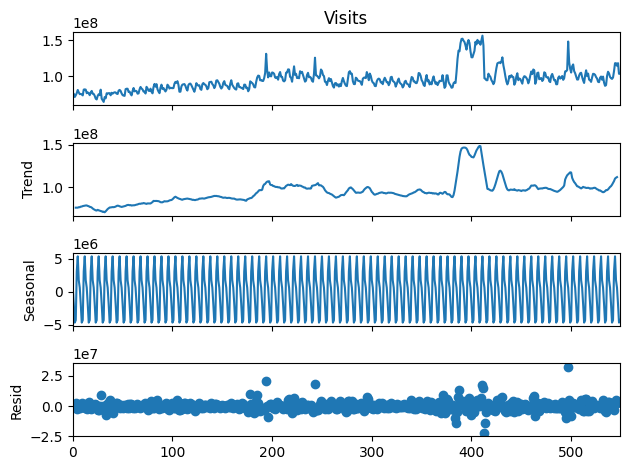

In [47]:
decomposition_at = seasonal_decompose(at_data[at_data['access_type'] == 'all-access']['Visits'], model='additive', period=7)

fig = decomposition_at.plot()

## Differencing and Interpreting ACF and PACF plots

In [48]:
e_diff = pd.DataFrame(english_data).diff(1)
e_diff.dropna(inplace=True)

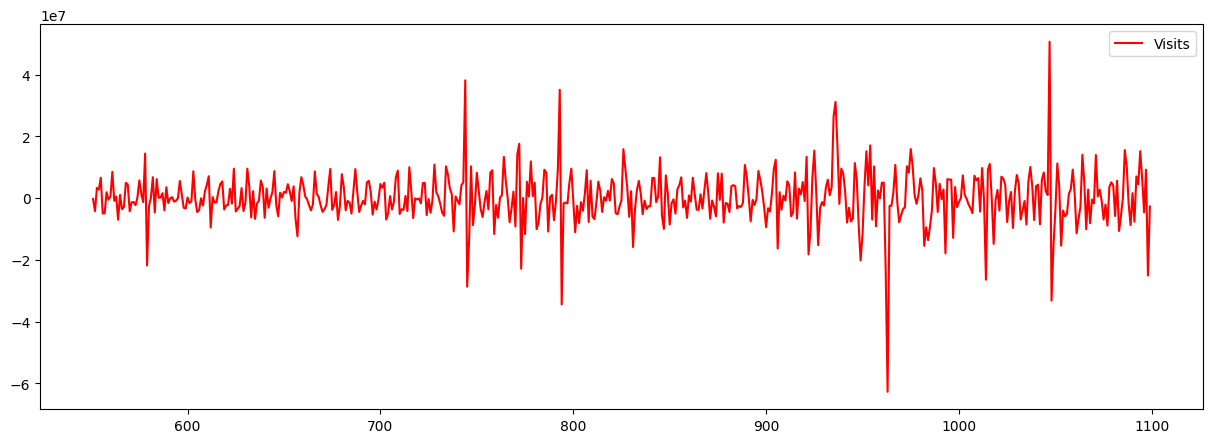

In [49]:
e_diff.plot(color = 'red', figsize = (15,5))
plt.show()

In [50]:
adf_test(e_diff)

Results of Dickey-Fuller Test:
Test Statistic                -8.273590e+00
p-value                        4.721272e-13
#Lags Used                     1.300000e+01
Number of Observations Used    5.350000e+02
Critical Value (1%)           -3.440000e+00
Critical Value (5%)           -2.870000e+00
Critical Value (10%)          -2.570000e+00
dtype: float64


* We are getting a stationary time series after a differentiation of 1. **d can therefore be 1**.

In [51]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

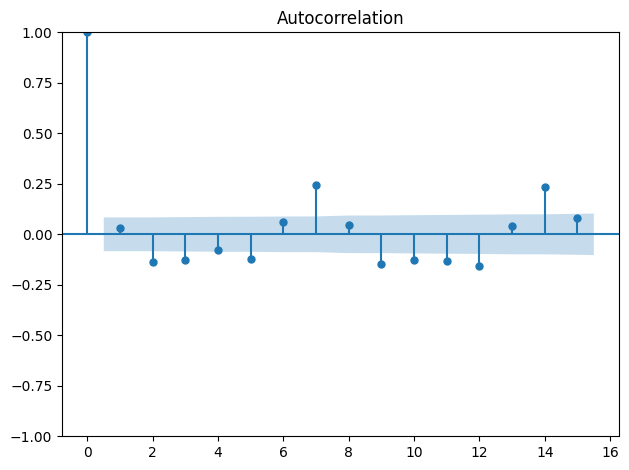

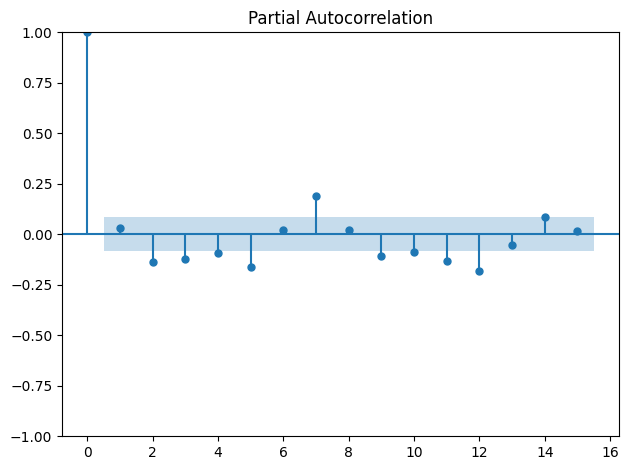

In [52]:
acf = plot_acf(e_diff, lags= 15)
acf.tight_layout()
pacf = plot_pacf(e_diff, lags= 15)
pacf.tight_layout()

* The ACF shows a sharp cutoff after lag 0, it suggests that an AR(0) model may be appropriate. **p can therefore be 0**
* The PACF has a sharp cutoff after lag 0, it suggests an MA(0) model may be appropriate. **q can therefore be 0**

In [53]:
e_diff = lang_data[lang_data.language == 'English'][['Date', 'Visits']]
e_diff.set_index('Date', inplace = True)

In [54]:
at_diff = at_data[at_data.access_type == 'all-access'][['Date', 'Visits']]
at_diff.set_index('Date', inplace = True)

In [55]:
ao_diff = ao_data[ao_data.access_origin == 'all-agents'][['Date', 'Visits']]
ao_diff.set_index('Date', inplace = True)

## **Modeling**

In [56]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from prophet import Prophet

### **ARIMA**

In [57]:
#Creating an ARIMA Model
def arima_model(n, order, time_series):
  model = ARIMA(time_series[:-n], order=order)
  model_fit = model.fit()
  forecast = model_fit.forecast(steps=n, alpha=0.05)
  time_series.index = pd.to_datetime(time_series.index)
  forecast.index = pd.to_datetime(forecast.index)
  time_series[-60:].plot(label='Actual')
  forecast.plot(label='Forecast', linestyle='dashed', marker='o', markerfacecolor='green', markersize=2)
  plt.legend(loc="upper right")
  plt.title(f'ARIMA BASE Model {order}: Actual vs Forecasts', fontsize=15, fontweight='bold')
  plt.show()


  actuals = time_series.values[-n:]
  errors = time_series.values[-n:] - forecast.values

  mape = np.mean(np.abs(errors) / np.abs(actuals))
  rmse = np.sqrt(np.mean(errors**2))

  # Print MAPE & RMSE
  print('-' * 80)
  print(f'MAPE of Model: {np.round(mape, 5)}')
  print('-' * 80)
  print(f'RMSE of Model: {np.round(rmse, 3)}')
  print('-' * 80)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


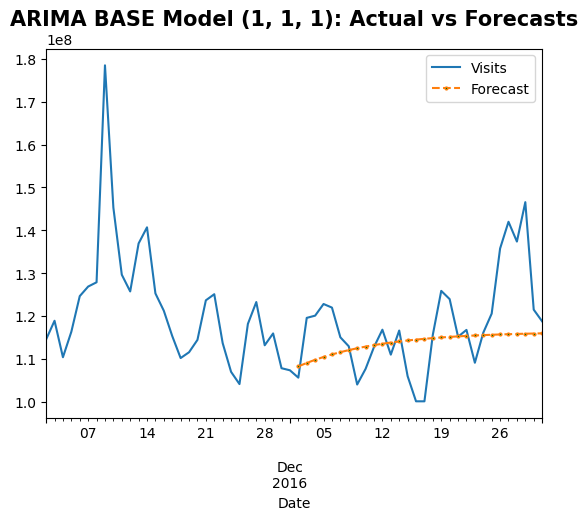

--------------------------------------------------------------------------------
MAPE of Model: 0.07229
--------------------------------------------------------------------------------
RMSE of Model: 12071774.914
--------------------------------------------------------------------------------


In [58]:
arima_model(30, (1,1,1), e_diff)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


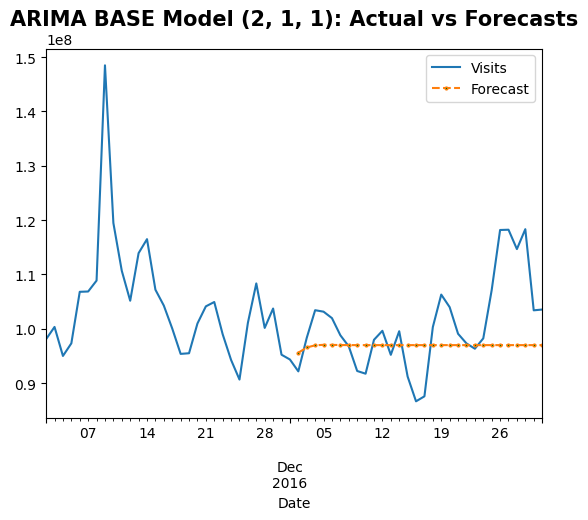

--------------------------------------------------------------------------------
MAPE of Model: 0.06298
--------------------------------------------------------------------------------
RMSE of Model: 9038171.436
--------------------------------------------------------------------------------


In [59]:
arima_model(30, (2,1,1), at_diff)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


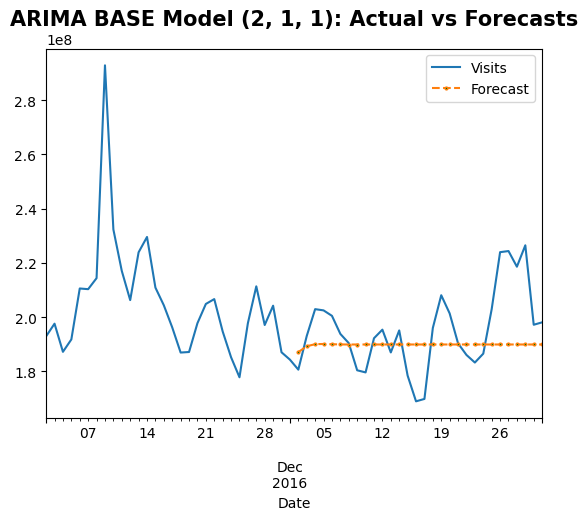

--------------------------------------------------------------------------------
MAPE of Model: 0.05885
--------------------------------------------------------------------------------
RMSE of Model: 15487528.792
--------------------------------------------------------------------------------


In [60]:
arima_model(30, (2,1,1), ao_diff)

### **SARIMAX**

In [61]:
#Creating a SARIMAX Model
def sarimax_model(time_series, n, p=0, d=0, q=0, P=0, D=0, Q=0, s=0, exog = []):

    #Creating SARIMAX Model with order(p,d,q) & seasonal_order=(P, D, Q, s)
    model = SARIMAX(time_series[:-n],
                    order=(p, d, q),
                    seasonal_order=(P, D, Q, s),
                    exog=exog[:-n],
                    initialization='approximate_diffuse')
    model_fit = model.fit()

    # Forecasting last n-values
    model_forecast = model_fit.forecast(n, dynamic=True, exog=pd.DataFrame(exog[-n:]))

    # Plotting Actual & Forecasted values
    plt.figure(figsize=(20, 8))
    time_series[-60:].plot(label='Actual')
    model_forecast[-60:].plot(label='Forecast', color='red',
                              linestyle='dashed', marker='o', markerfacecolor='green', markersize=5)
    plt.legend(loc="upper right")
    plt.title(f'SARIMAX Model ({p},{d},{q}) ({P},{D},{Q},{s}) : Actual vs Forecasts', fontsize=15, fontweight='bold')
    plt.show()

    # Calculating MAPE & RMSE
    actuals = time_series.values[-n:]
    errors = time_series.values[-n:] - model_forecast.values

    mape = np.mean(np.abs(errors) / np.abs(actuals))
    rmse = np.sqrt(np.mean(errors ** 2))

    # Printing metrics
    print('-' * 80)
    print(f'MAPE of Model : {np.round(mape, 5)}')
    print('-' * 80)
    print(f'RMSE of Model : {np.round(rmse, 3)}')
    print('-' * 80)

In [62]:
exogenous_data = exogenous_data['Exog'].to_numpy()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<Figure size 2000x800 with 0 Axes>

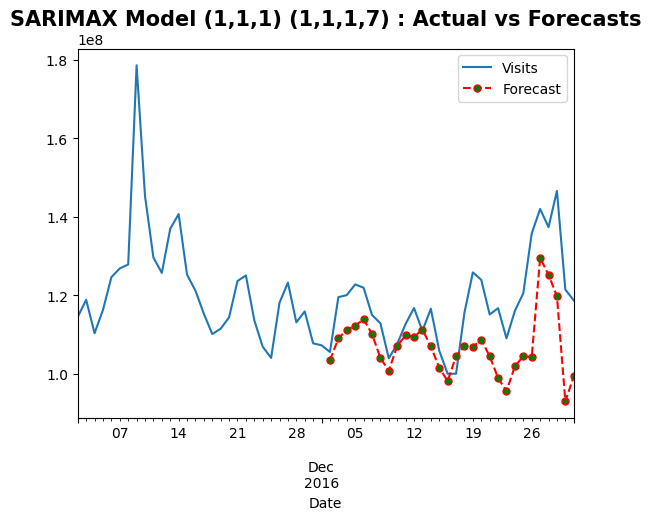

--------------------------------------------------------------------------------
MAPE of Model : 0.11208
--------------------------------------------------------------------------------
RMSE of Model : 17326667.279
--------------------------------------------------------------------------------


In [63]:
sarimax_model(time_series=e_diff, n=30, p=1, d=1, q=1, P=1, D=1, Q=1, s=7, exog=exogenous_data)

In [64]:
from itertools import product

In [65]:
def sarimax_grid_search(time_series, n, param, d_param, s_param, exog=[]):
  #creating a dataframe to hold the params
  param_df = pd.DataFrame(columns=['serial_count', 'pdq', 'PDQs', 'mape', 'rmse'])

  #generating parameter combination
  p_combi = product(param,d_param,param,param,d_param,param,s_param)

  count = 0

  #iterate through the parameter combination
  for p, d, q, P, D, Q, s in p_combi:
    model = SARIMAX(time_series[:-n],
                    order=(p, d, q),
                    seasonal_order=(P, D, Q, s),
                    exog=exog[:-n],
                    initialization='approximate_diffuse')
    model_fit = model.fit()

    model_forecast = model_fit.forecast(n, dynamic=True, exog=pd.DataFrame(exog[-n:]))

    actuals = time_series.values[-n:]
    errors = time_series.values[-n:] - model_forecast.values

    mape = np.round(np.mean(np.abs(errors) / np.abs(actuals)),5)
    rmse = np.round(np.sqrt(np.mean(errors ** 2)),3)

    count+=1
    param_df.loc[count] = [count, (p, d, q), (P, D, Q, s), mape, rmse]

  return param_df


In [66]:
warnings.filterwarnings("ignore")

In [67]:
e_params = sarimax_grid_search(e_diff, 30, [0,1,2], [0,1], [7],exog=exogenous_data)
e_params.sort_values(['mape','rmse'], ascending=[True,True])

,serial_count,pdq,PDQs,mape,rmse
289,289,"(2, 1, 1)","(0, 0, 0, 7)",0.08737,1.390974e+07
290,290,"(2, 1, 1)","(0, 0, 1, 7)",0.08903,1.411103e+07
291,291,"(2, 1, 1)","(0, 0, 2, 7)",0.08988,1.421080e+07
295,295,"(2, 1, 1)","(1, 0, 0, 7)",0.09013,1.423713e+07
301,301,"(2, 1, 1)","(2, 0, 0, 7)",0.09273,1.456823e+07
...,...,...,...,...,...
20,20,"(0, 0, 1)","(0, 0, 1, 7)",0.81709,1.040184e+08
2,2,"(0, 0, 0)","(0, 0, 1, 7)",0.84750,1.062396e+08
37,37,"(0, 0, 2)","(0, 0, 0, 7)",0.90763,1.105358e+08
19,19,"(0, 0, 1)","(0, 0, 0, 7)",0.91844,1.115709e+08


<Figure size 2000x800 with 0 Axes>

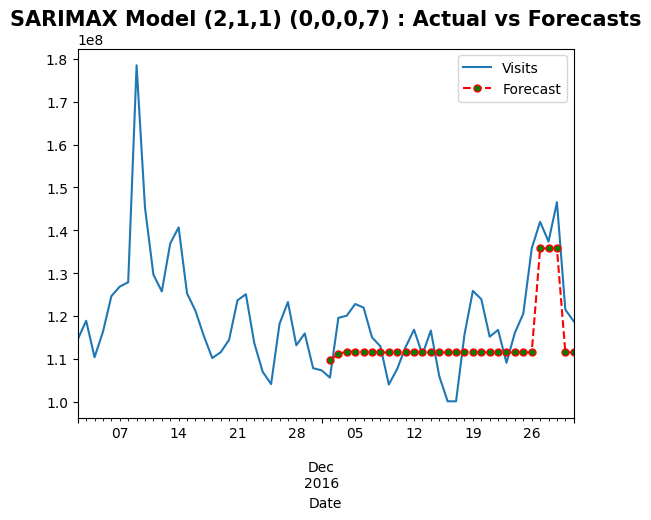

--------------------------------------------------------------------------------
MAPE of Model : 0.08737
--------------------------------------------------------------------------------
RMSE of Model : 13909735.545
--------------------------------------------------------------------------------


In [68]:
sarimax_model(time_series=e_diff, n=30, p=2,d=1,q=1,P=0,D=0,Q=0,s=7, exog = exogenous_data)

<Figure size 2000x800 with 0 Axes>

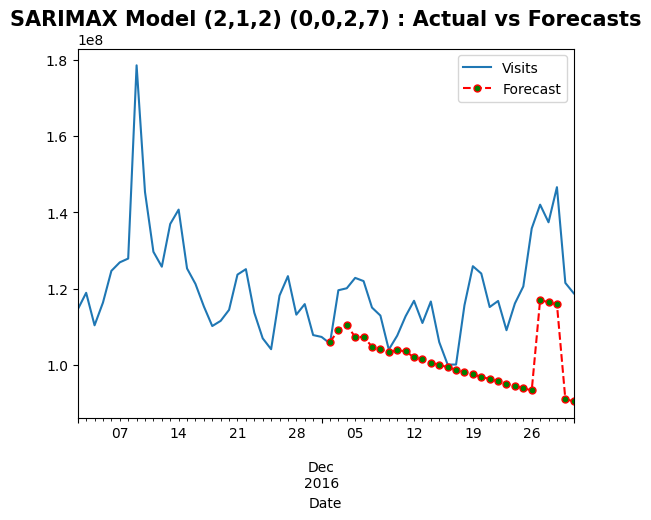

--------------------------------------------------------------------------------
MAPE of Model : 0.13971
--------------------------------------------------------------------------------
RMSE of Model : 20831867.727
--------------------------------------------------------------------------------


In [69]:
sarimax_model(time_series=e_diff, n=30, p=2,d=1,q=2,P=0,D=0,Q=2,s=7, exog = exogenous_data)

#### Pipeline for Finding best parameters

In [70]:
#Function to find the best params for all the language
def sarimax_grid_search_without_exog(languages, data_language, n, param, d_param, s_param):

    best_param_df = pd.DataFrame(columns=['language', 'p', 'd', 'q', 'P', 'D', 'Q', 's', 'mape','rmse'])

    for lang in languages:
        time_series = data_language[data_language['language'] == lang][['Date', 'Visits']]
        time_series.set_index('Date', drop=True, inplace=True)
        best_mape = 100

        counter = 0
        param_combinations = product(param, d_param, param, param, d_param, param, s_param)

        for p, d, q, P, D, Q, s in param_combinations:
            model = SARIMAX(time_series[:-n],
                            order=(p, d, q),
                            seasonal_order=(P, D, Q, s),
                            initialization='approximate_diffuse')
            model_fit = model.fit()
            model_forecast = model_fit.forecast(n, dynamic=True)

            actuals = time_series.values[-n:]
            errors = time_series.values[-n:] - model_forecast.values

            mape = np.round(np.mean(np.abs(errors) / np.abs(actuals)),5)
            rmse = np.round(np.sqrt(np.mean(errors ** 2)),3)

            counter += 1
            if mape < best_mape:
                best_mape = mape
                best_p, best_d, best_q = p, d, q
                best_P, best_D, best_Q = P, D, Q
                best_s = s
                best_rmse = rmse

            #print(f'Possible Combination: {counter} out of {(len(param)**4)*len(s_param)*(len(d_param)**2)} calculated')

        best_mape = np.round(best_mape, 5)
        print(f'--------------------------------------------------------------')
        print(f'Minimum MAPE for {lang} = {best_mape}')
        print(f'Corresponding Best Parameters are {best_p, best_d, best_q, best_P, best_D, best_Q, best_s}')
        print(f'--------------------------------------------------------------')

        best_param_row = [lang, best_p, best_d, best_q, best_P, best_D, best_Q, best_s, best_mape,best_rmse]
        best_param_df.loc[len(best_param_df)] = best_param_row

    return best_param_df

In [71]:
lang = ['Chinese','English','German','Russian','Spanish','French','Japenese']
best_param_df = sarimax_grid_search_without_exog(lang, lang_data, 30, [0,1,2], [0,1], [7])


--------------------------------------------------------------
Minimum MAPE for Chinese = 0.03932
Corresponding Best Parameters are (2, 1, 0, 0, 0, 0, 7)
--------------------------------------------------------------
--------------------------------------------------------------
Minimum MAPE for English = 0.07168
Corresponding Best Parameters are (2, 1, 2, 0, 0, 2, 7)
--------------------------------------------------------------
--------------------------------------------------------------
Minimum MAPE for German = 0.08384
Corresponding Best Parameters are (2, 0, 1, 0, 0, 0, 7)
--------------------------------------------------------------
--------------------------------------------------------------
Minimum MAPE for Russian = 0.06795
Corresponding Best Parameters are (0, 0, 1, 2, 0, 0, 7)
--------------------------------------------------------------
--------------------------------------------------------------
Minimum MAPE for Spanish = 0.14351
Corresponding Best Parameters are (

In [72]:
best_param_df.sort_values(['mape'], inplace = True)
best_param_df

,language,p,d,q,P,D,Q,s,mape,rmse
0,Chinese,2,1,0,0,0,0,7,0.03932,2.899434e+05
3,Russian,0,0,1,2,0,0,7,0.06795,1.206324e+06
1,English,2,1,2,0,0,2,7,0.07168,1.196208e+07
5,French,0,1,2,0,0,0,7,0.08091,1.489350e+06
2,German,2,0,1,0,0,0,7,0.08384,2.195115e+06
6,Japenese,1,1,2,0,0,1,7,0.09340,2.400871e+06
4,Spanish,2,0,0,0,0,1,7,0.14351,2.344696e+06


In [73]:
def plot_best_SARIMAX_model(languages, data_language, n, best_param_df):
    for lang in languages:
        # Fetching respective best parameters for that language
        params_lang = best_param_df[best_param_df['language'] == lang].iloc[0]
        p, d, q, P, D, Q, s = params_lang[['p', 'd', 'q', 'P', 'D', 'Q', 's']]

        # Creating language time-series
        time_series = data_language[data_language['language'] == lang][['Date', 'Visits']]
        time_series.set_index('Date', drop=True, inplace=True)

        # Creating SARIMAX Model
        model = SARIMAX(time_series[:-n], order=(p, d, q),
                        seasonal_order=(P, D, Q, s), initialization='approximate_diffuse')
        model_fit = model.fit()

        # Creating forecast for last n-values
        model_forecast = model_fit.forecast(n, dynamic=True)

        # Calculating MAPE & RMSE
        actuals = time_series.values[-n:]
        errors = time_series.values[-n:] - model_forecast.values
        mape = np.mean(np.abs(errors) / np.abs(actuals))
        rmse = np.sqrt(np.mean(errors**2))

        # Printing model statistics
        print(f'\n{"-" * 90}')
        print(f'SARIMAX model for {lang} Time Series')
        print(f'Parameters of Model: ({p}, {d}, {q}) ({P}, {D}, {Q}, {s})')
        print(f'MAPE of Model: {np.round(mape, 5)}')
        print(f'RMSE of Model: {np.round(rmse, 3)}')
        print(f'{"-" * 90}')

        # Plotting Actual & Forecasted values
        time_series.index = time_series.index.astype('datetime64[ns]')
        model_forecast.index = model_forecast.index.astype('datetime64[ns]')
        plt.figure(figsize=(20, 8))
        time_series[-60:].plot(label='Actual')
        model_forecast[-60:].plot(label='Forecast', color='red',
                                  linestyle='dashed', marker='o', markerfacecolor='green', markersize=5)
        plt.legend(loc="upper right")
        plt.title(f'SARIMAX Model ({p}, {d}, {q}) ({P}, {D}, {Q}, {s}): Actual vs Forecasts',
                  fontsize=15, fontweight='bold')
        plt.show()



------------------------------------------------------------------------------------------
SARIMAX model for Chinese Time Series
Parameters of Model: (2, 1, 0) (0, 0, 0, 7)
MAPE of Model: 0.03932
RMSE of Model: 289943.436
------------------------------------------------------------------------------------------


<Figure size 2000x800 with 0 Axes>

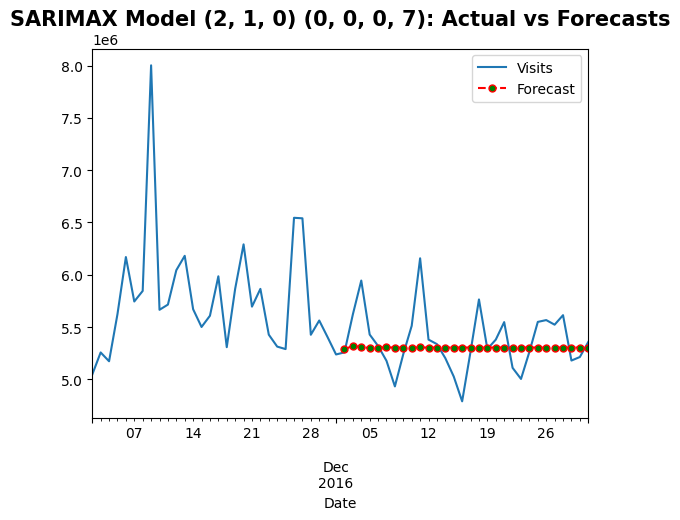


------------------------------------------------------------------------------------------
SARIMAX model for English Time Series
Parameters of Model: (2, 1, 2) (0, 0, 2, 7)
MAPE of Model: 0.07168
RMSE of Model: 11962078.279
------------------------------------------------------------------------------------------


<Figure size 2000x800 with 0 Axes>

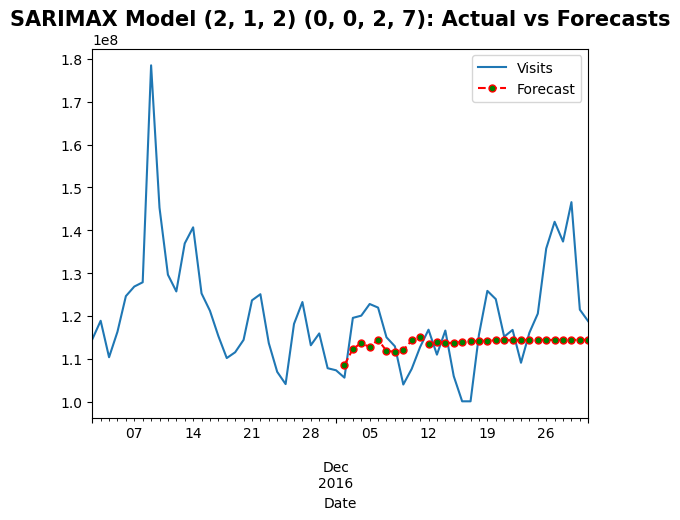


------------------------------------------------------------------------------------------
SARIMAX model for German Time Series
Parameters of Model: (2, 0, 1) (0, 0, 0, 7)
MAPE of Model: 0.08384
RMSE of Model: 2195114.679
------------------------------------------------------------------------------------------


<Figure size 2000x800 with 0 Axes>

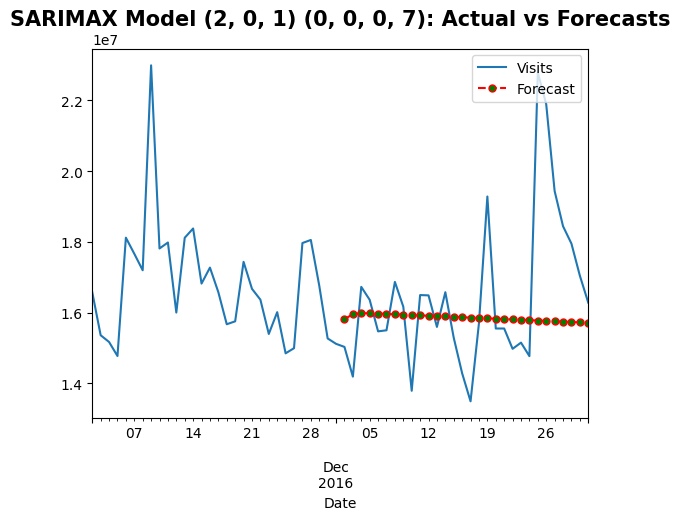


------------------------------------------------------------------------------------------
SARIMAX model for Russian Time Series
Parameters of Model: (0, 0, 1) (2, 0, 0, 7)
MAPE of Model: 0.06795
RMSE of Model: 1206324.353
------------------------------------------------------------------------------------------


<Figure size 2000x800 with 0 Axes>

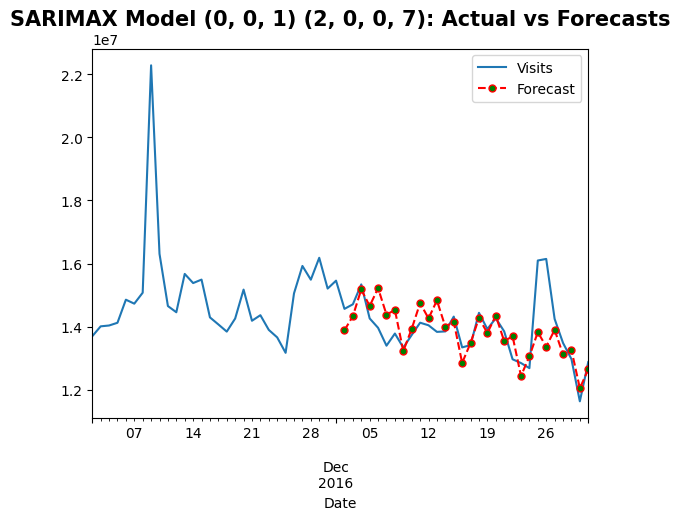


------------------------------------------------------------------------------------------
SARIMAX model for Spanish Time Series
Parameters of Model: (2, 0, 0) (0, 0, 1, 7)
MAPE of Model: 0.14351
RMSE of Model: 2344695.867
------------------------------------------------------------------------------------------


<Figure size 2000x800 with 0 Axes>

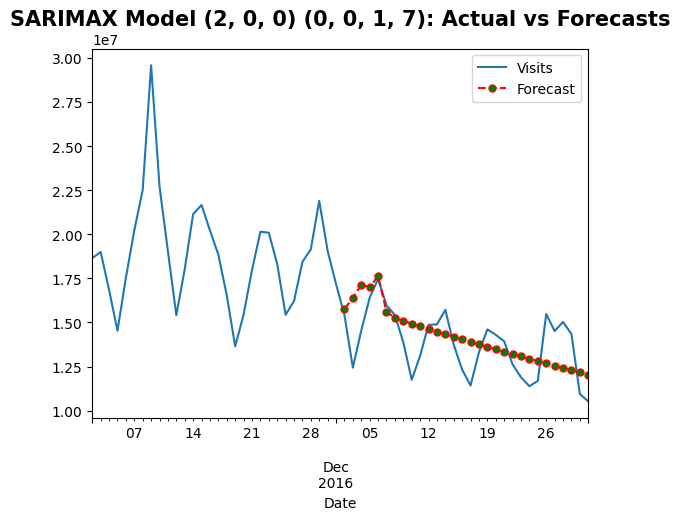


------------------------------------------------------------------------------------------
SARIMAX model for French Time Series
Parameters of Model: (0, 1, 2) (0, 0, 0, 7)
MAPE of Model: 0.08091
RMSE of Model: 1489350.009
------------------------------------------------------------------------------------------


<Figure size 2000x800 with 0 Axes>

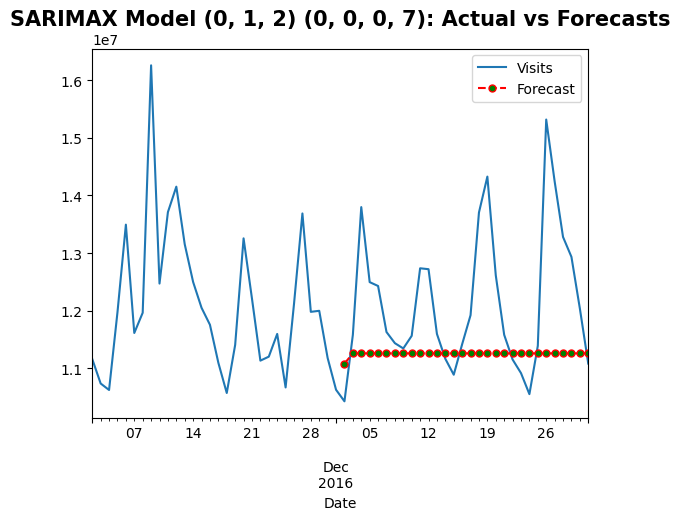


------------------------------------------------------------------------------------------
SARIMAX model for Japenese Time Series
Parameters of Model: (1, 1, 2) (0, 0, 1, 7)
MAPE of Model: 0.0934
RMSE of Model: 2400870.834
------------------------------------------------------------------------------------------


<Figure size 2000x800 with 0 Axes>

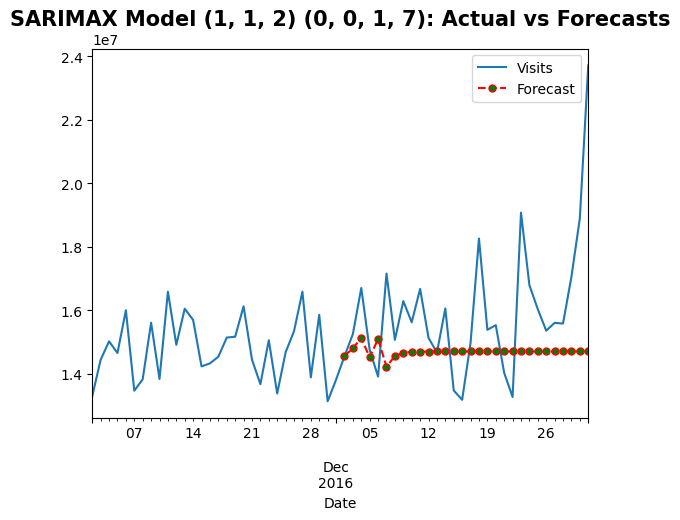

In [74]:
plot_best_SARIMAX_model(lang, lang_data, 30, best_param_df)

In [75]:
time_series = lang_data[lang_data['language'] == 'English'][['Date', 'Visits']]
time_series.columns = ['ds', 'y']
time_series['exog'] = exogenous_data

In [76]:
ts_ao = ao_data[ao_data['access_origin'] == 'all-agents'][['Date', 'Visits']]
ts_ao.columns = ['ds', 'y']
ts_ao['exog'] = exogenous_data

In [77]:
ts_at = at_data[at_data['access_type'] == 'all-access'][['Date', 'Visits']]
ts_at.columns = ['ds', 'y']
ts_at['exog'] = exogenous_data

## Forecasting with Facebook Prophet

### Forecasting with Language

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnuxbd93e/frbtg1do.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnuxbd93e/lvwkolp2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51513', 'data', 'file=/tmp/tmpnuxbd93e/frbtg1do.json', 'init=/tmp/tmpnuxbd93e/lvwkolp2.json', 'output', 'file=/tmp/tmpnuxbd93e/prophet_modelryt6alvg/prophet_model-20241113135631.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:56:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:56:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


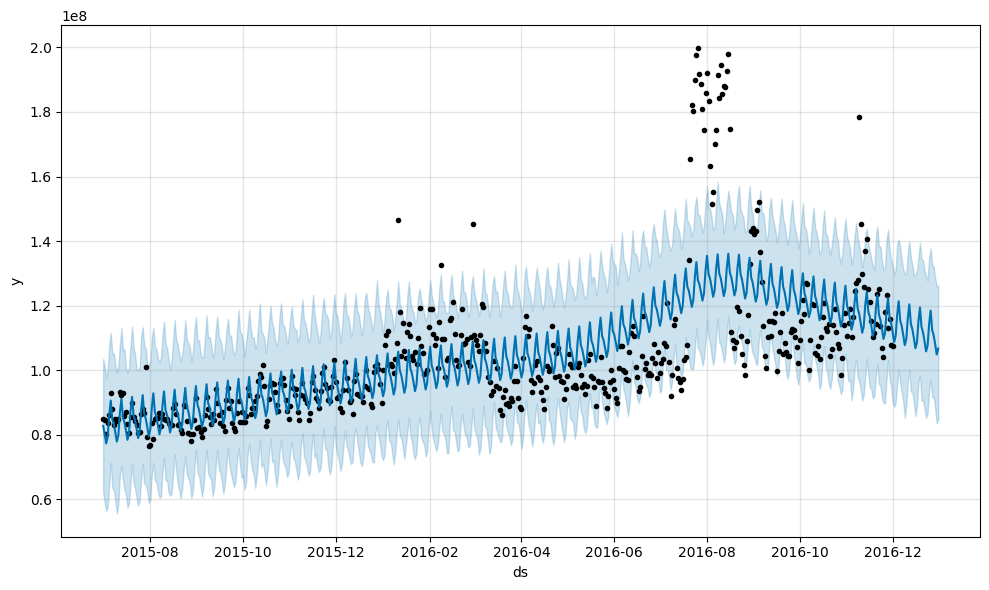

In [78]:
prophet1 = Prophet(weekly_seasonality=True)
prophet1.fit(time_series[['ds', 'y']][:-30])
future = prophet1.make_future_dataframe(periods=30, freq= 'D')
forecast = prophet1.predict(future)
fig1 = prophet1.plot(forecast)

### Forecasting with Access Origin with Exog

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnuxbd93e/m9_a8wpx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnuxbd93e/gbiqt433.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66119', 'data', 'file=/tmp/tmpnuxbd93e/m9_a8wpx.json', 'init=/tmp/tmpnuxbd93e/gbiqt433.json', 'output', 'file=/tmp/tmpnuxbd93e/prophet_modelc99_lbtu/prophet_model-20241113135632.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:56:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:56:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


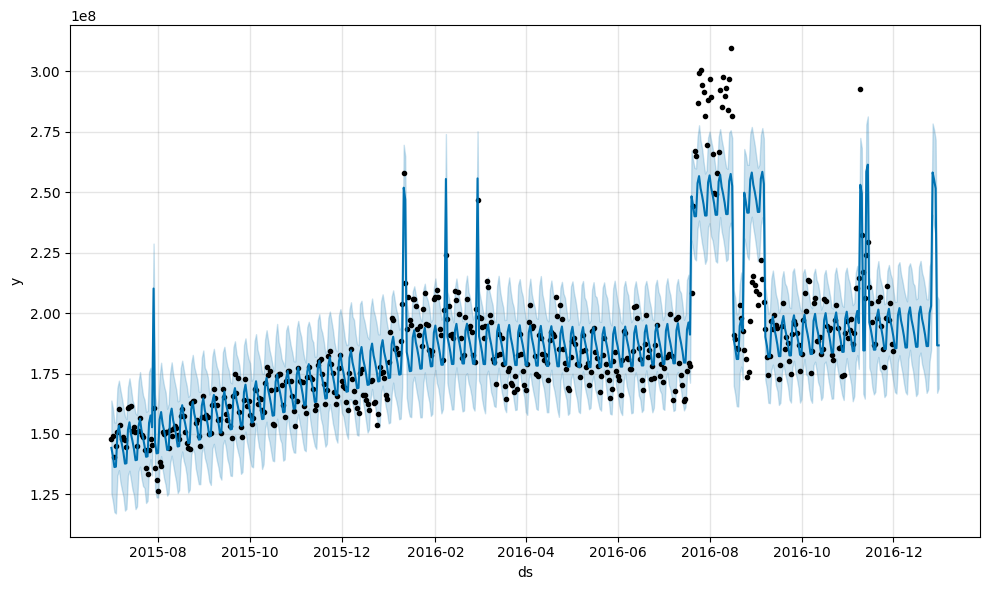

In [79]:
prophet3 = Prophet(weekly_seasonality=True)
prophet3.add_regressor('exog')
prophet3.fit(ts_ao[:-30])
forecast_ao = prophet3.predict(ts_ao)
fig_ao = prophet3.plot(forecast_ao)

### Forecasting with Language with Exog

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnuxbd93e/9am_mi7w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnuxbd93e/1d75sh7r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75973', 'data', 'file=/tmp/tmpnuxbd93e/9am_mi7w.json', 'init=/tmp/tmpnuxbd93e/1d75sh7r.json', 'output', 'file=/tmp/tmpnuxbd93e/prophet_modelu29iw4er/prophet_model-20241113135633.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:56:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:56:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


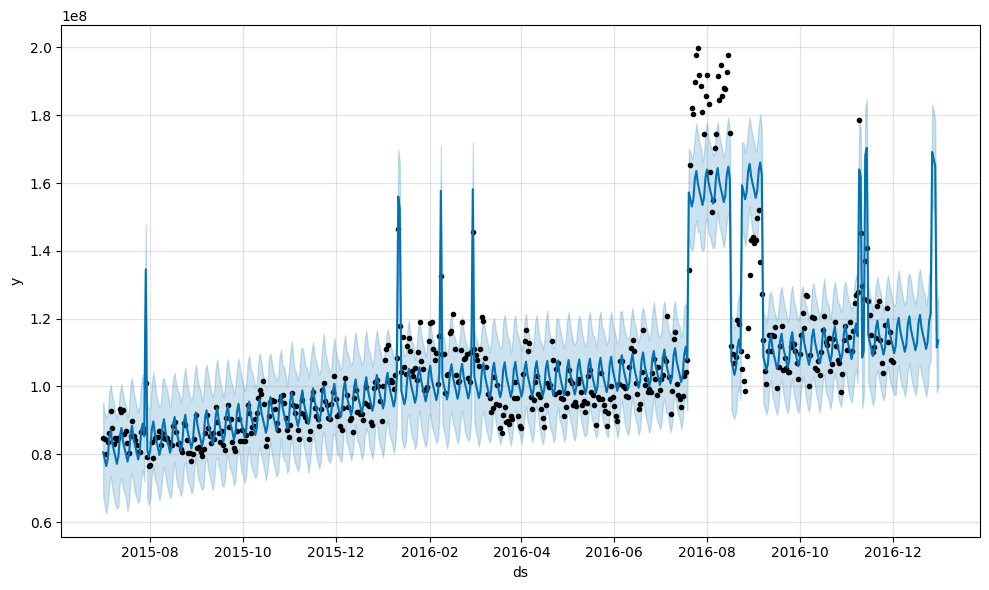

In [80]:
prophet2 = Prophet(weekly_seasonality=True)
prophet2.add_regressor('exog')
prophet2.fit(time_series[:-30])
#future2 = prophet2.make_future_dataframe(periods=30, freq= 'D')
forecast2 = prophet2.predict(time_series)
fig2 = prophet2.plot(forecast2)

### Forecasting with Access Type with Exog

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnuxbd93e/a8730dhg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnuxbd93e/u0hl1bxt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85024', 'data', 'file=/tmp/tmpnuxbd93e/a8730dhg.json', 'init=/tmp/tmpnuxbd93e/u0hl1bxt.json', 'output', 'file=/tmp/tmpnuxbd93e/prophet_modelwps4_gh_/prophet_model-20241113135635.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:56:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:56:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


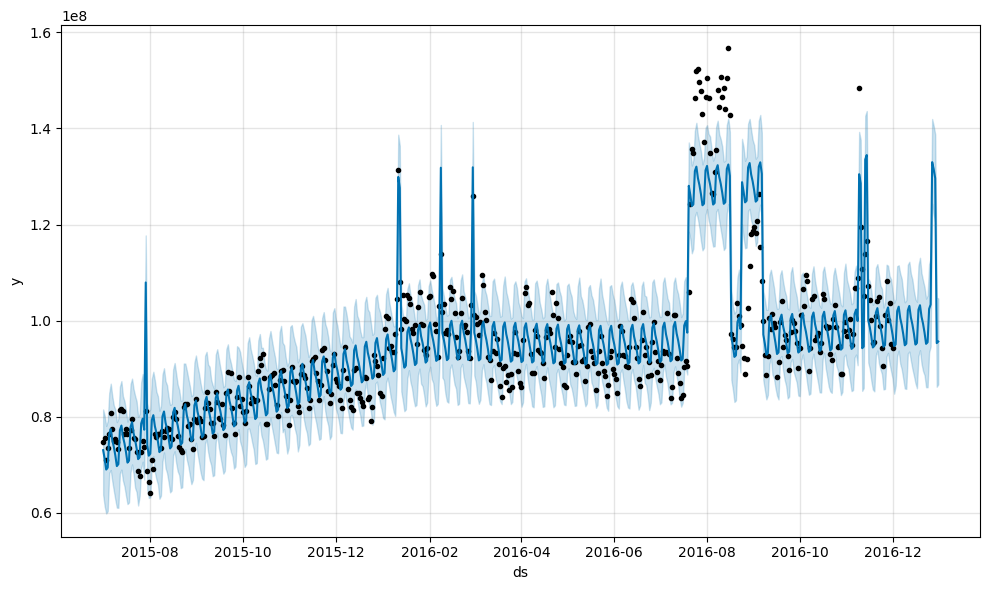

In [81]:
prophet4 = Prophet(weekly_seasonality=True)
prophet4.add_regressor('exog')
prophet4.fit(ts_at[:-30])
forecast_at = prophet4.predict(ts_at)
fig_at = prophet4.plot(forecast_at)

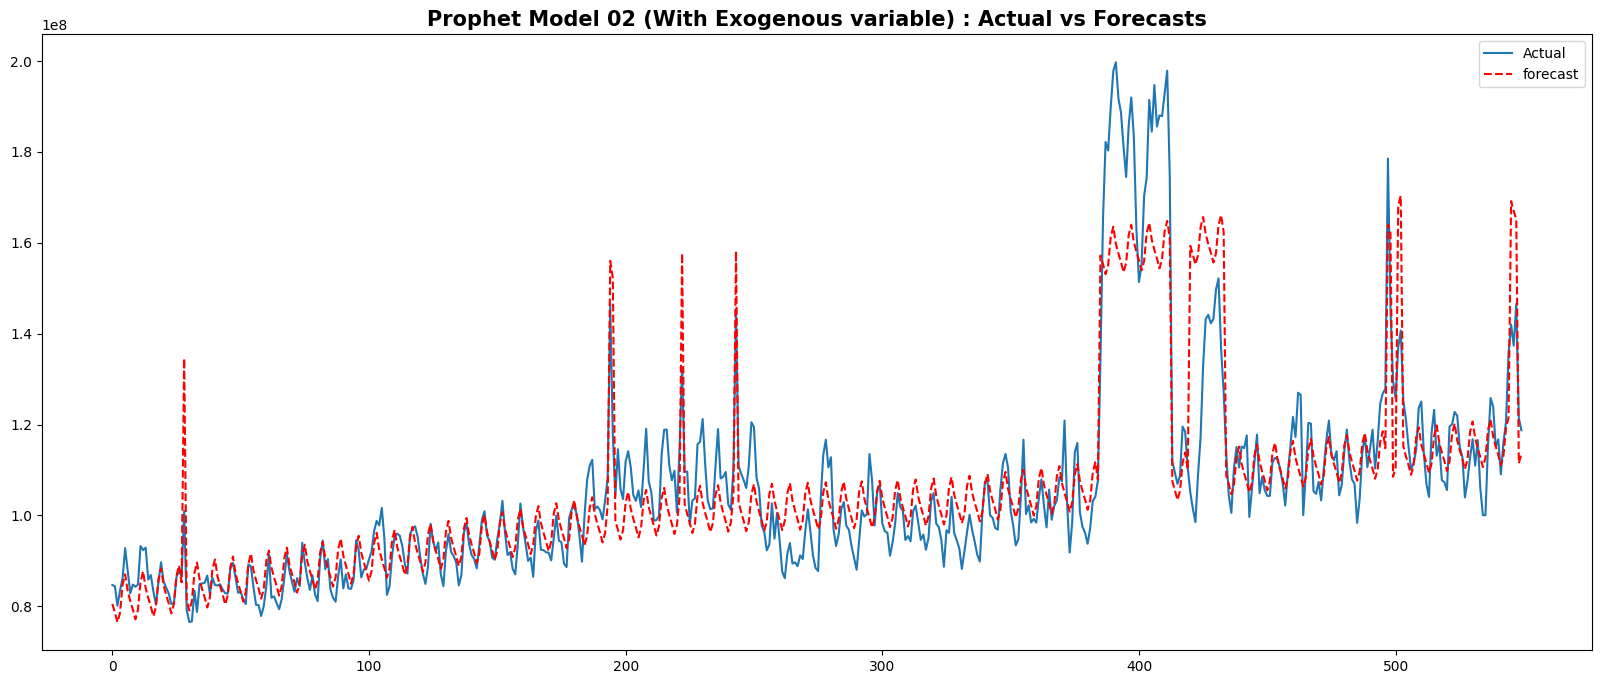

In [82]:
actual = time_series['y'].values
forecast = forecast2['yhat'].values

plt.figure(figsize = (20,8))
plt.plot(actual, label = 'Actual')
plt.plot(forecast, label = 'forecast', color = 'red', linestyle='dashed')
plt.legend(loc="upper right")
plt.title(f'Prophet Model 02 (With Exogenous variable) : Actual vs Forecasts', fontsize = 15, fontweight = 'bold')
plt.show()

In [83]:
errors = abs(actual - forecast)
mape = np.mean(errors/abs(actual))
mape

0.05983786254333203

* The Prophet Model is able to capture peaks because of exogenous variable and is giving a MAPE of 6%

## **Insights**

* Among all the languages English have highest views and other languages have almost similar views
* Half of the views coming from all-access device and remaining half views are splitted between desktop and mobile
* 75% of web traffic is generated from all-agents origin followed by 25% from Spider
* Whenever there is campaign (1 in exogenous variable) overall web traffic is very high
* From hypothesis test it is evident that language, access and origin are not independent on each other

* **English Language Dominance**: English stands out as the leading language, indicating that it should be prioritized for advertisements due to its low Mean Absolute Percentage Error (MAPE) and high average visit count.

* **Chinese Language Considerations**: Pages in Chinese have the lowest visit counts, suggesting careful consideration for advertisements here unless specifically targeting Chinese-speaking audiences.

* **Russian Language Potential**: Russian pages offer a favourable balance between visit count and MAPE, highlighting an opportunity for strong conversion rates with strategic advertisement placement.

* **Spanish Language Challenges**: Although Spanish pages rank second in visit count, they have the highest MAPE, indicating possible challenges in achieving effective advertisement performance.

* **Moderate Performers**: French, German, and Japanese pages show moderate visit counts and MAPE levels, suggesting the need for targeted advertisement strategies based on specific customer demographics.

## **Questionnaire**

**1.Defining the problem statements and where can this and modifications of this be used?**

* The Data Science team at Ad ease aims to analyse per page view reports for various Wikipedia pages spanning 550 days.
* The objective includes forecasting page views to enhance ad placement optimization for clients.
* Dataset encompasses 145k Wikipedia pages with daily view counts.
* Client base extends across diverse regions, necessitating insights into ad performance across different languages.
* Implementing a forecast model is helpful in predicting fluctuations in page visits
* Using the results from forecast the business team can optimize the marketing expenditure
* Prediction of time of high traffic for the pages helps in strategic ad placement and optimize the costs   

**2.Write 3 inferences you made from the data visualizations**

* The data has 7 languages with English dominating the visits followed by Japanese , German and French
* There are 3 access types identified after separation All-access, mobile-web, and desktop—comprising 51.4%, 24.9%, and 23.6% respectively.
* Two access origin types are present namely - 'all-agents' and 'spider'—with 'all-agents' constituting 75.8% and 'spider' 24.2% of the data.


**3.What does the decomposition of series do?**
* Time Series Decomposition is a statistical method to break down the series to its constituent components to understand the structure of  trends , seasonality and irregular fluctuations.
* Decomposition involves separating the time series data to 3 components
  * Trend
  * Seasonality
  * Residual

**4.What level of differencing gave you a stationary series?**
* Through First order of differencing we were able to achieve a stationary series.

**5.Difference between arima, sarima & sarimax.**

* **ARIMA**
  * ARIMA is a time series forecasting model that combines autoregression (AR), differencing (I), and moving average (MA) components.
  * It's suitable for univariate time series data without exogenous variables.
  * ARIMA(p,d,q) where p represents the autoregressive order, d represents the differencing order, and q represents the moving average order
  * May not capture seasonality effectively

* **SARIMA**
  * This an extension to ARIMA model and captures seasonality.
  * Its suitable for timeseries with seasonality
  * SARIMA (P,D,Q,p,q,d,s)
    * P,D,Q:Seasonal AR, differencing, and MA orders.
    * p,q,d:Non-seasonal AR, MA, and differencing orders.
    * s:Seasonality period.

* **SARIMAX**
  * Its an extension of SARIMA model with the inclusion of exogenous variable which influence the time series.
  * It's suitable for time series data with both seasonal patterns and external variables.
  * Retains SARIMA's p, d, q, P, D, Q, s, with the addition of
 specifying exogenous variables through the exog parameter.

**6.Compare the number of views in different languages.**

In [84]:
grouped = df.groupby(['language','access_type','access_origin'], as_index=False)['Visits'].sum()
grouped = grouped[grouped['language'] != 'Unknown_language']

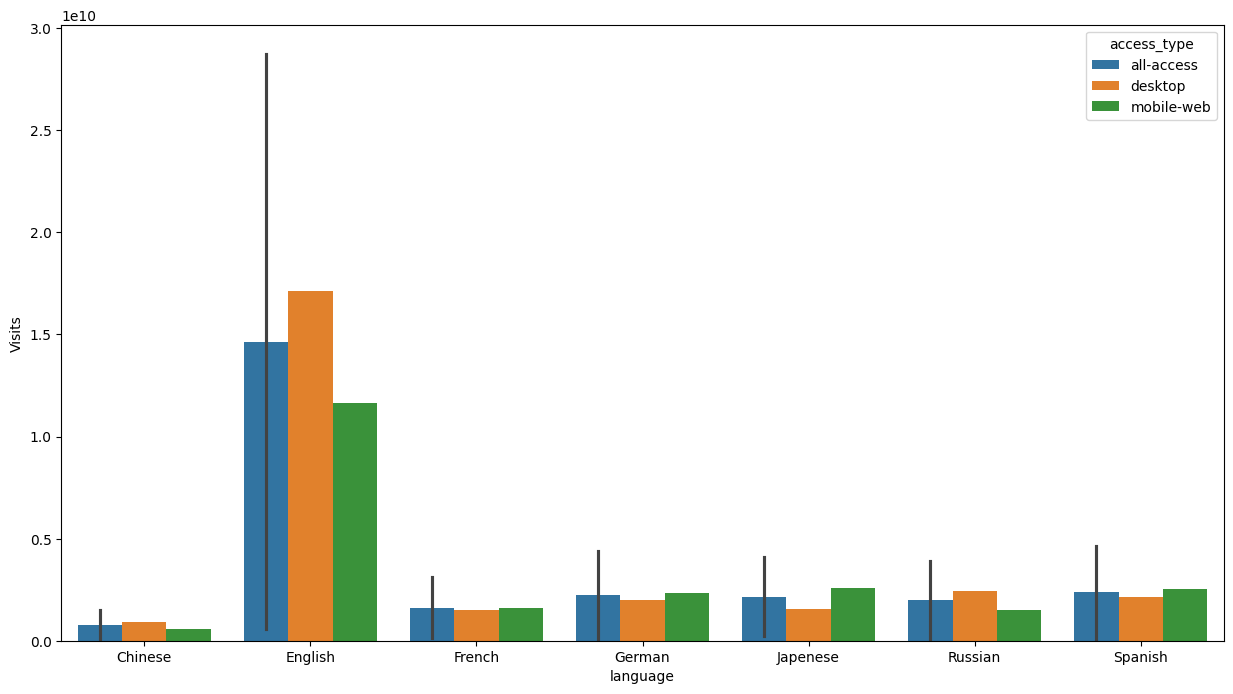

In [85]:
plt.figure(figsize = (15,8))
sns.barplot(x='language', y='Visits', hue='access_type', data=grouped)
plt.show()

1. **English Pages Lead**: English pages dominate in visit counts, especially on desktop, making them ideal for broad-reaching ads.

2. **Chinese Pages Show Low Engagement**: Chinese pages have the fewest visits across all access types, suggesting limited advertising potential without targeted strategies.

3. **Balanced Access in Non-English Languages**: French, German, Japanese, Russian, and Spanish show consistent engagement across desktop and mobile, suitable for cross-platform ads.

4. **Mobile Focus for Japanese**: Japanese pages see relatively higher mobile-web visits, indicating mobile-oriented ad potential for Japanese audiences.

**7.What other methods other than grid search would be suitable to get the model for all languages?**

* Auto - ARIMA can be used which selects the optimal ARIMA based on the information criteria like AIC/BIC
* Scikit learn random search can also be used
* Optuna: A powerful hyperparameter optimization framework that supports various algorithms.
* Hyperopt and sci-kit-optimize



## **Recommendations**

1. **Maximize English Advertising**: Focus on English-language pages for ad placement to leverage their high reach and low MAPE, ensuring a strong return on investment.

2. **Strategically Target Chinese Audiences**: Refrain from broad advertising on Chinese-language pages unless the campaign is specifically designed for Chinese demographics, as lower visits may limit impact.

3. **Capitalize on Russian Language Potential**: Implement well-optimized ads on Russian-language pages to achieve high conversion rates, given the favourable MAPE and visit count.

4. **Refine Spanish Campaigns**: Re-evaluate advertising approaches on Spanish-language pages, as high MAPE suggests lower ad effectiveness. Explore strategies to increase engagement and lower ad costs.

5. **Optimize Mid-Tier Languages**: Tailor advertisements on French, German, and Japanese pages according to specific customer demographics to enhance engagement, as these pages have moderate visits and MAPE.

6. **Conduct Targeted Testing**: Use A/B testing on Spanish, French, German, and Japanese language pages to find the most effective messaging that could reduce MAPE and increase visit conversion rates.

7. **Monitor MAPE Variations**: Regularly track MAPE on all language pages, especially Spanish, to adjust strategies quickly if ad performance improves or declines.

8. **Segment Ads by Region and Language**: Design ad variations based on regional language preferences to increase relevance and conversion rates across English, Russian, and other selected languages.